# Practicel ML - KNN

### Full Name : Mana Abbaszadeh
### Student Number : 400109638

In this Notebook, we will implement KNN for the given dataset. This notebook has 3 phases, in the first phase we explore dataset, in the second phase we preprocess the dataset and in the last phase we implement KNN from scratch and also with sklearn and train it on the dataset.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

Inspect the first rows of the dataframe

In [29]:
# TODO
df = pd.read_csv('train.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,29,No,Travel_Rarely,592,Research & Development,7,3,Life Sciences,1,1883,...,2,80,0,11,2,3,3,2,1,2
1,36,No,Travel_Rarely,884,Sales,1,4,Life Sciences,1,1585,...,1,80,0,15,5,3,1,0,0,0
2,34,No,Travel_Rarely,1326,Sales,3,3,Other,1,1478,...,4,80,0,15,2,3,13,9,3,12
3,27,No,Travel_Rarely,954,Sales,9,3,Marketing,1,1965,...,1,80,0,7,5,3,7,7,0,7
4,32,No,Travel_Rarely,929,Sales,10,3,Marketing,1,722,...,4,80,0,10,2,2,10,7,0,8


Calculate the number of samples

In [6]:
# TODO
num_samples = df.shape[0]
print(f'Number of samples: {num_samples}')

Number of samples: 1102


Measure the number of unique values for each column. Note that Attrition is the target column.

In [24]:
# TODO
print(f'Number of unique values for each column:\n')

for col in df.columns:
    if col != 'Attrition':
        unique_vals = df[col].nunique()
        print(f"{col}: {unique_vals}")

Number of unique values for each column:

Age: 43
BusinessTravel: 3
DailyRate: 736
Department: 3
DistanceFromHome: 29
Education: 5
EducationField: 6
EmployeeCount: 1
EmployeeNumber: 1102
EnvironmentSatisfaction: 4
Gender: 2
HourlyRate: 71
JobInvolvement: 4
JobLevel: 5
JobRole: 9
JobSatisfaction: 4
MaritalStatus: 3
MonthlyIncome: 1027
MonthlyRate: 1082
NumCompaniesWorked: 10
Over18: 1
OverTime: 2
PercentSalaryHike: 15
PerformanceRating: 2
RelationshipSatisfaction: 4
StandardHours: 1
StockOptionLevel: 4
TotalWorkingYears: 40
TrainingTimesLastYear: 7
WorkLifeBalance: 4
YearsAtCompany: 34
YearsInCurrentRole: 19
YearsSinceLastPromotion: 16
YearsWithCurrManager: 17


Check if there is a column with less than two unique values. If such a columns exists, remove it!

In [37]:
# TODO
cols_to_remove = [col for col in df.columns if df[col].nunique() < 2]
print(f'-Columns to remove: {cols_to_remove}\n')

new_df = df.drop(columns=cols_to_remove)
remained_cols = new_df.columns
print(f'-The remained columns are:\n{remained_cols.tolist()}\n')

new_df.head()

-Columns to remove: ['EmployeeCount', 'Over18', 'StandardHours']

-The remained columns are:
['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'BusinessTravel_encoded', 'BusinessTravel_numerical']



,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_encoded,BusinessTravel_numerical
0,29,No,Travel_Rarely,592,Research & Development,7,3,Life Sciences,1883,4,...,0,11,2,3,3,2,1,2,2,2
1,36,No,Travel_Rarely,884,Sales,1,4,Life Sciences,1585,2,...,0,15,5,3,1,0,0,0,2,2
2,34,No,Travel_Rarely,1326,Sales,3,3,Other,1478,4,...,0,15,2,3,13,9,3,12,2,2
3,27,No,Travel_Rarely,954,Sales,9,3,Marketing,1965,4,...,0,7,5,3,7,7,0,7,2,2
4,32,No,Travel_Rarely,929,Sales,10,3,Marketing,722,4,...,0,10,2,2,10,7,0,8,2,2


Plot Mean BusinessTravel against Age. Note: Since the BusinessTravel column is categorical, you should first consider another column corresponding to each unique value BusinessTravel takes. For instance, you may assume that if someone does not travel, the value of the column for this person is 0.

In [19]:
# handle uniqueness
# TODO
unique_business_travel = new_df['BusinessTravel'].unique()
print(f'Unique business travel values: {unique_business_travel}')

Unique business travel values: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']


- Mapping with LabelEncoder and fit_transform:

In [80]:
# Note : run this just in case if you want to map the BusinessTravel with LabelEncoder()

# Map the column
# TODO

label_encoder = LabelEncoder()
new_df['BusinessTravel_numerical'] = label_encoder.fit_transform(new_df['BusinessTravel'])

- Mapping with desired numerical values and map:

In [79]:
# Note : run this just in case if you want to map the BusinessTravel with desired numerical values
business_travel_mapping = {
    'Non-Travel': 0,
    'Travel_Rarely': 1,
    'Travel_Frequently': 2
}

new_df['BusinessTravel_numerical'] = new_df['BusinessTravel'].map(business_travel_mapping)

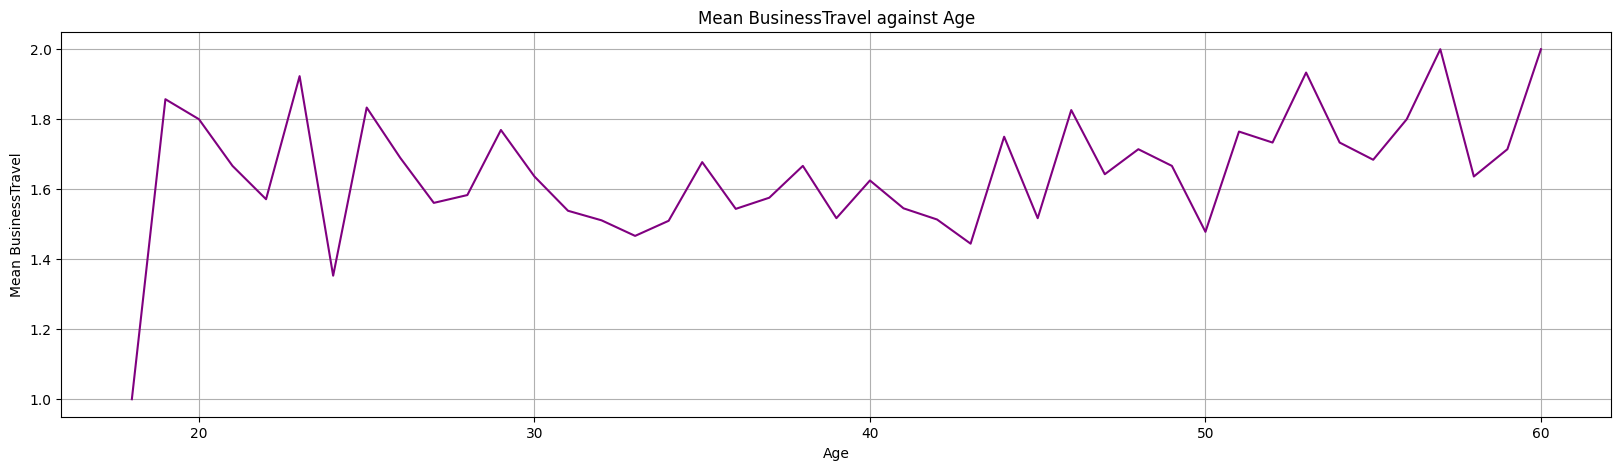

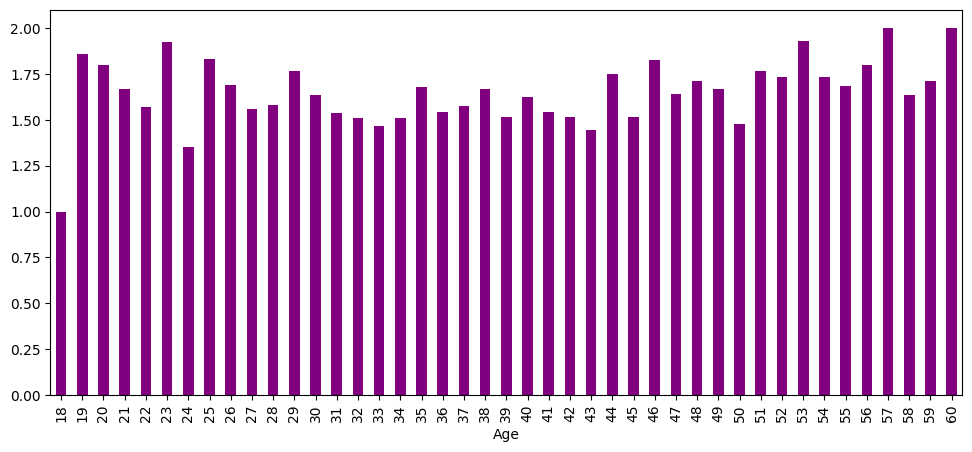

In [81]:
# plot
# TODO

mean_business_travel = new_df.groupby('Age')['BusinessTravel_numerical'].mean()

plt.figure(figsize=(20, 5))
sns.lineplot(x=mean_business_travel.index, y=mean_business_travel.values, color='purple')
plt.title('Mean BusinessTravel against Age')
plt.xlabel('Age')
plt.ylabel('Mean BusinessTravel')
plt.grid(True)
plt.show()

plt.figure(figsize=(40, 5))
plt.subplot(1, 3, 3)
mean_business_travel.plot(kind='bar', color='purple')
plt.show()


Check if there seems to be a meaningful relationship between people's age and the years they have worked with their current manager. Your result should be a plot.

- We can see the relationship between people's age and the years they have worked with their current manager:

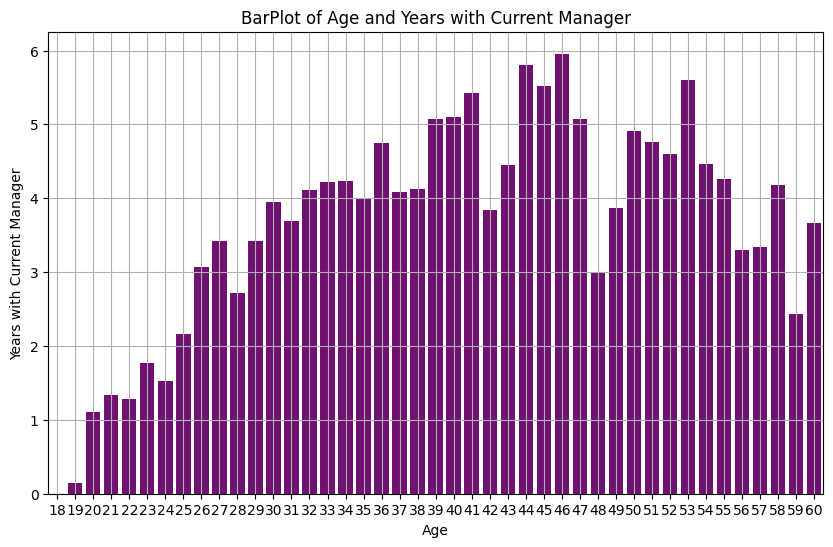

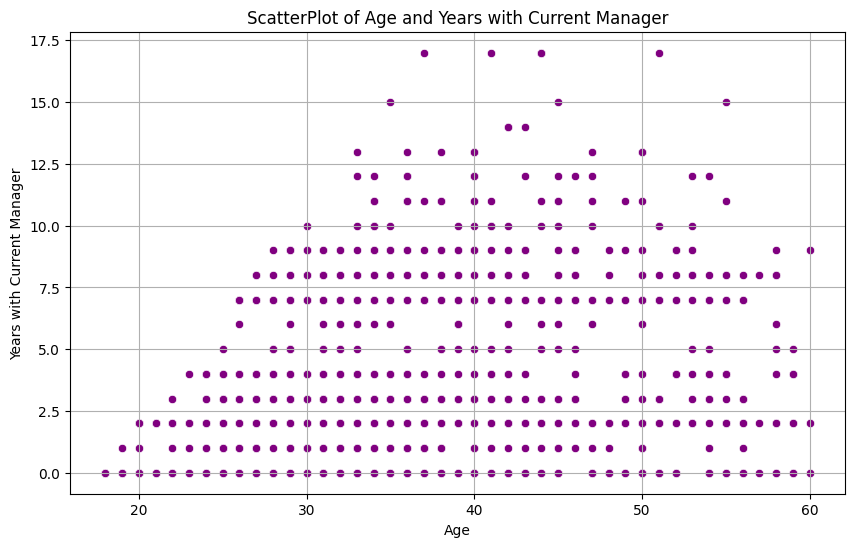

In [82]:
# TODO
mean_years_with_current_manager = df.groupby('Age')['YearsWithCurrManager'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=mean_years_with_current_manager.index, y=mean_years_with_current_manager.values, color='purple')
plt.title("BarPlot of Age and Years with Current Manager")
plt.xlabel("Age")
plt.ylabel("Years with Current Manager")
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='YearsWithCurrManager', data=new_df, color='purple')
plt.title("ScatterPlot of Age and Years with Current Manager")
plt.xlabel("Age")
plt.ylabel("Years with Current Manager")
plt.grid(True)
plt.show()

Plot the average MonthlyIncome against the YearsAtCompany. 

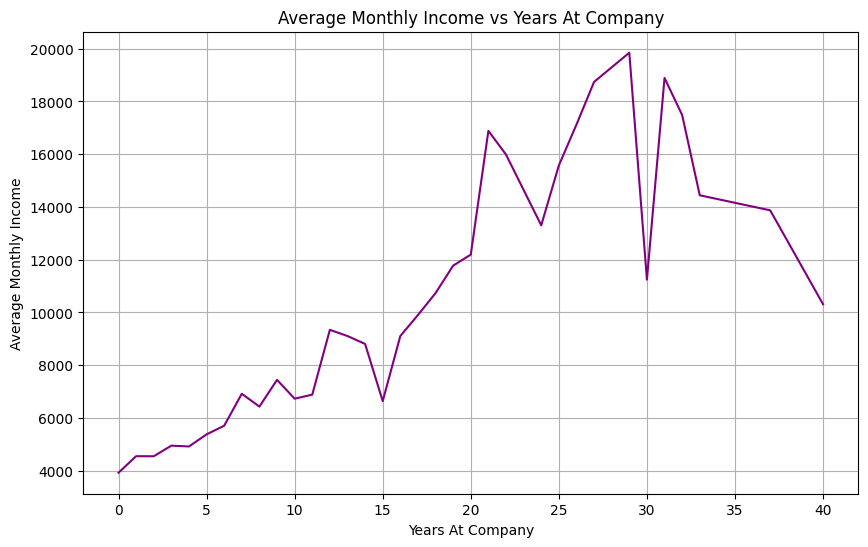

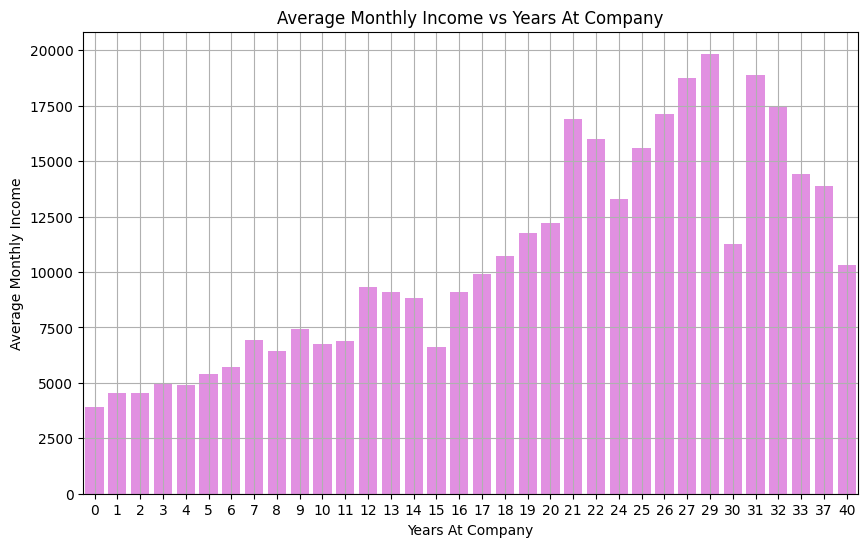

In [83]:
# TODO
data = new_df.groupby('YearsAtCompany')['MonthlyIncome'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='YearsAtCompany', y='MonthlyIncome', data=data, color='purple')
plt.title("Average Monthly Income vs Years At Company")
plt.xlabel("Years At Company")
plt.ylabel("Average Monthly Income")
plt.grid(True)
plt.show()


bar_plot_data = new_df.groupby('YearsAtCompany')['MonthlyIncome'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=bar_plot_data.index, y=bar_plot_data.values, color='violet')
plt.title("Average Monthly Income vs Years At Company")
plt.xlabel("Years At Company")
plt.ylabel("Average Monthly Income")
plt.grid(True)
plt.show()

## Preprocessing

Label encode all categorical columns and split the data into train and test parts. The training part will further splitted into train and validation parts.

In [85]:
# Label encode
# TODO

categorical_columns = new_df.select_dtypes(include=['object']).columns

label_encoders = {}
for col in categorical_columns:
    label_encoders = LabelEncoder()
    new_df[col] = label_encoders.fit_transform(new_df[col])

In [89]:
# split into train and validation
# TODO

X = new_df.drop(columns=['Attrition'])
y = new_df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [93]:
# lens of train and validation datasets
# TODO
print(f'Train set length: {len(X_train)}')
print(f'Validation set length: {len(X_val)}')
print(f'Test set length: {len(X_test)}')

Train set length: 660
Validation set length: 221
Test set length: 221


Split the test and validation dataframe into feature and label part, Attrition columns is the target columns and rest of the columns should be treated as features. (Note that win_or_defeat column is the target column)

In [96]:
# TODO
# This part was done in the previous sections by dropping the target column which is the 'Attrition' column.


# Model Implementation From Scratch
  



## How the algorithm works

**We calculate the euclidean distance between a new sample and all points**

**We determine the label of the sample based on the majority vote**

## Key Points:

### Euclidean Distance
**Euclidean distance is defined as the distance between two points**

**Where it's represented by this equation :
$$\sqrt{\sum\limits_{i = 0}^{m-1} (x - y)^2}$$**


In [110]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k=3):
        """
        Initialize the KNN classifier.

        Parameters:
        - k (int): Number of neighbors to consider.
        """
        # TODO
        self.k = k


    def fit(self, X_train, y_train):
        """
        Fit the KNN classifier to the training data.

        Parameters:
        - X_train (DataFrame): Training feature vectors.
        - y_train (Series): Training labels.
        """
        # TODO
        self.X_train = X_train
        self.y_train = y_train


    def euclidean_distance(self, x1, x2):
        """
        Calculate the distance between two data points.

        Parameters:
        - x1 (numpy array): First data point.
        - x2 (numpy array): Second data point.

        Returns:
        - float: Distance between x1 and x2.
        """
        # TODO
        distance = np.sqrt(np.sum((x2 - x1) ** 2))
        return distance


    def predict(self, X_test):
        """
        Predict labels for test data.

        Parameters:
        - X_test (DataFrame): Test feature vectors.

        Returns:
        - numpy array: Predicted labels.
        """
        # TODO
        preds = []
        for item in X_test.values:
            preds.append(self._predict(item))
        results = np.array(preds)
        return results


    def _predict(self, x):
        """
        Predict label for a single data point.

        Parameters:
        - x (numpy array): Test data point.

        Returns:
        - int: Predicted label.
        """
        # TODO
        distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train.values]
        indeces = np.argsort(distances)[:self.k]
        kn_labels = [self.y_train.iloc[inc] for inc in indeces]
        the_most_label = Counter(kn_labels).most_common(1)
        return the_most_label[0][0]



# Evaluation
  

Define the model and train it.

In [111]:
# TODO
knn_model = KNN(k=3)
knn_model.fit(X_train, y_train)

Predict the y_train and y_test values.

In [114]:
# TODO
y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)

y_train_val = y_train.values
y_test_val = y_test.values

train_acc = np.mean(y_train_pred == y_train_val)
train_err = np.mean(y_train_pred != y_train_val)

test_acc = np.mean(y_test_pred == y_test_val)
test_err = np.mean(y_test_pred != y_test_val)

print(f'Train Accuracy: {train_acc}\nTest Accuracy: {test_acc}\n')
print(f'Train Error: {train_err}\nTest Error: {test_err}')

Train Accuracy: 0.8727272727272727
Test Accuracy: 0.755656108597285

Train Error: 0.12727272727272726
Test Error: 0.24434389140271492


# Sklearn Implementation
  

Define the sklearn knn model and fit to the training data

In [116]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [117]:
# TODO
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Now predict the defined model on test data and return the accuracy

In [120]:
# TODO
y_test_pred = knn_model.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)

print(f'Accuracy: {test_acc}')


Accuracy: 0.755656108597285


In [122]:
y_train_pred = knn_model.predict(X_train)

train_err = 1 - accuracy_score(y_train, y_train_pred)
test_err = 1 - accuracy_score(y_test, y_test_pred)

train_acc = accuracy_score(y_train, y_train_pred)

print(f'Train Error: {train_err}\nTest Error: {test_err}')
print(f'Train Accuracy: {train_acc}')

Train Error: 0.12727272727272732
Test Error: 0.24434389140271495
Train Accuracy: 0.8727272727272727
